In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

##Installing Yfinance

In [ ]:
!pip install yfinance
!pip install yahoofinancials


     |████████████████████████████████| 6.4 MB 7.3 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
  Created wheel for yahoofinancials: filename=yahoofinancials-1.6-py3-none-any.whl size=15192 sha256=480a8d1f88517a7c4c74d562a72348735d12950047b8613255042d02e533004f
  Stored in directory: /root/.cache/pip/wheels/4b

In [ ]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import yfinance as yf
from yahoofinancials import YahooFinancials

##Extracting Twitter Data from 2013 to 2022

In [ ]:
twtr_df = yf.download('TWTR', 
                      start='2013-11-07', 
                      end='2022-02-21', 
                      progress=False,
)
twtr_df.head()
print(twtr_df.shape)
twtr_df.head()

(2086, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-11-07,45.099998,50.090000,44.000000,44.900002,44.900002,117701600
2013-11-08,45.930000,46.939999,40.689999,41.650002,41.650002,27925300
2013-11-11,40.500000,43.000000,39.400002,42.900002,42.900002,16113900
2013-11-12,43.660000,43.779999,41.830002,41.900002,41.900002,6316700
2013-11-13,41.029999,42.869999,40.759998,42.599998,42.599998,8688300


In [ ]:
twtr_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-14,35.619999,36.610001,35.500000,35.689999,35.689999,15212600
2022-02-15,36.230000,37.000000,36.060001,36.980000,36.980000,21350400
2022-02-16,35.970001,36.279999,35.520000,36.240002,36.240002,17602400
2022-02-17,35.990002,36.610001,35.320000,35.430000,35.430000,16524400
2022-02-18,35.490002,35.660000,34.099998,34.320000,34.320000,15339000


In [ ]:
twtr_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2.086000e+03
mean,35.552157,36.216548,34.868121,35.523480,35.523480,2.103116e+07
std,14.513054,14.771072,14.210032,14.479406,14.479406,1.559079e+07
min,13.950000,14.220000,13.730000,14.010000,14.010000,3.661100e+06
25%,24.152501,24.592500,23.700001,24.252500,24.252500,1.250222e+07
50%,34.385000,34.990002,33.855000,34.365000,34.365000,1.696735e+07
75%,44.047500,44.862499,43.042500,43.897501,43.897501,2.412875e+07
max,78.360001,80.750000,76.050003,77.629997,77.629997,1.924153e+08


In [ ]:
twtr_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-11-07,45.099998,50.090000,44.000000,44.900002,44.900002,117701600
2013-11-08,45.930000,46.939999,40.689999,41.650002,41.650002,27925300
2013-11-11,40.500000,43.000000,39.400002,42.900002,42.900002,16113900
2013-11-12,43.660000,43.779999,41.830002,41.900002,41.900002,6316700
2013-11-13,41.029999,42.869999,40.759998,42.599998,42.599998,8688300
...,...,...,...,...,...,...
2022-02-14,35.619999,36.610001,35.500000,35.689999,35.689999,15212600
2022-02-15,36.230000,37.000000,36.060001,36.980000,36.980000,21350400
2022-02-16,35.970001,36.279999,35.520000,36.240002,36.240002,17602400


##Saving the time series in .pkl format

In [ ]:
twtr_df = twtr_df.drop(twtr_df.columns[[0, 1, 2, 3, 5]], axis=1)
df1 = pd.DataFrame(twtr_df.to_records()).rename(columns={'date':'time'})
df1.head()

,Date,Adj Close
0,2013-11-07,44.900002
1,2013-11-08,41.650002
2,2013-11-11,42.900002
3,2013-11-12,41.900002
4,2013-11-13,42.599998


In [ ]:
df1.tail()

,Date,Adj Close
2081,2022-02-14,35.689999
2082,2022-02-15,36.980000
2083,2022-02-16,36.240002
2084,2022-02-17,35.430000
2085,2022-02-18,34.320000


In [ ]:
df1

,Date,Adj Close
0,2013-11-07,44.900002
1,2013-11-08,41.650002
2,2013-11-11,42.900002
3,2013-11-12,41.900002
4,2013-11-13,42.599998
...,...,...
2081,2022-02-14,35.689999
2082,2022-02-15,36.980000
2083,2022-02-16,36.240002
2084,2022-02-17,35.430000


##Note: df1 is the final dataset with Twitter's Adj Close Stock Prices

In [ ]:
df1.shape

(2086, 2)

##Sorting the Data

In [ ]:
df2 = df1.sort_values("Date")
df2 = df2.set_index("Date")
df2.tail()

,Adj Close
Date,
2022-02-14,35.689999
2022-02-15,36.980000
2022-02-16,36.240002
2022-02-17,35.430000
2022-02-18,34.320000


##Pickling the Data

In [ ]:
df2.to_pickle("/content/drive/My Drive/twitter_stock_data_pk.pkl")

In [ ]:
df3 = pd.read_pickle("/content/drive/My Drive/twitter_stock_data_pk.pkl")
df3.head()


,Adj Close
Date,
2013-11-07,44.900002
2013-11-08,41.650002
2013-11-11,42.900002
2013-11-12,41.900002
2013-11-13,42.599998


In [ ]:
df3.tail()

,Adj Close
Date,
2022-02-14,35.689999
2022-02-15,36.980000
2022-02-16,36.240002
2022-02-17,35.430000
2022-02-18,34.320000


##Note: df3 is the final pickled dataset

##Plotting

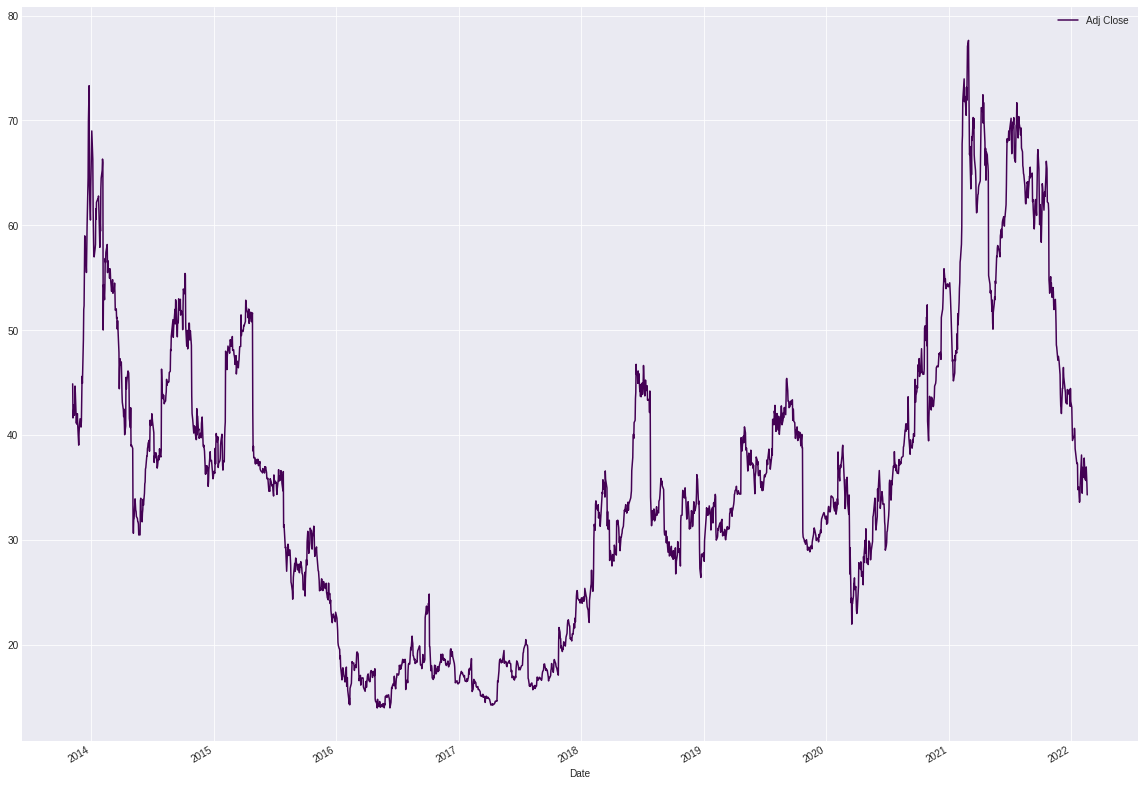

In [ ]:
plt.style.use('seaborn-dark')

df3.plot(cmap= "viridis",figsize=(20,15))
plt.grid()
plt.show()

In [ ]:


import pandas as pd
 
df = pd.read_pickle("/content/drive/MyDrive/microsoft_processed_text_with_time_and_gensim.pkl")

EOFError: ignored

In [ ]:
#view

import pickle
import pandas

#df_check = pd.read_pickle("/content/drive/MyDrive/microsoft_processed_text_with_time_and_gensim.pkl")
df_check = pickle.load('/content/drive/MyDrive/microsoft_processed_text_with_time_and_gensim.pkl')
de_check= df_check.to_csv('/content/drive/MyDrive/microsoft_processed_text_with_time_and_gensim.pkl')    #to save the dataframe, df to 123.pkl
df_check = pd.read_csv('/content/drive/MyDrive/microsoft_processed_text_with_time_and_gensim.csv') #to load 123.pkl back to the dataframe df
df_check

FileNotFoundError: ignored